# Spline Constraints Demo
This notebook demonstrates how constraints can be applied to different splines using the `lpspline` package.


In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

from lpspline.spline import Linear, PiecewiseLinear, BSpline
from lpspline.constraints import Anchor, Monotonic, Concave, Convex
from lpspline.optimizer import LpRegressor

# Create a sample dataset
np.random.seed(42)
x_data = np.linspace(-5, 5, 200)
# A somewhat wavy relationship
y_data = np.sin(x_data) + np.random.normal(0, 0.2, 200)

df = pl.DataFrame({"x": x_data, "y": y_data})

def plot_fit(opt, title=""):
    opt.fit(df, df["y"])
    y_pred = opt.predict(df)
    
    plt.figure(figsize=(8, 4))
    plt.scatter(df["x"], df["y"], alpha=0.3, label="Data")
    plt.plot(df["x"], y_pred, color='red', linewidth=2, label="Fit")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


## 1. Anchor Constraint
The `Anchor` constraint forces a spline to pass through specific `(x, y)` points.


Unconstrained PWL:

✨ Model Summary ✨
Problem Status: ✅ optimal
--------------------------------------------------------------------------------
Spline Type               | Term            | Params   | Constraints                   
--------------------------------------------------------------------------------
🟢 PiecewiseLinear        | x               | 5        | None                          
--------------------------------------------------------------------------------
📊 Total Parameters                         | 5        |



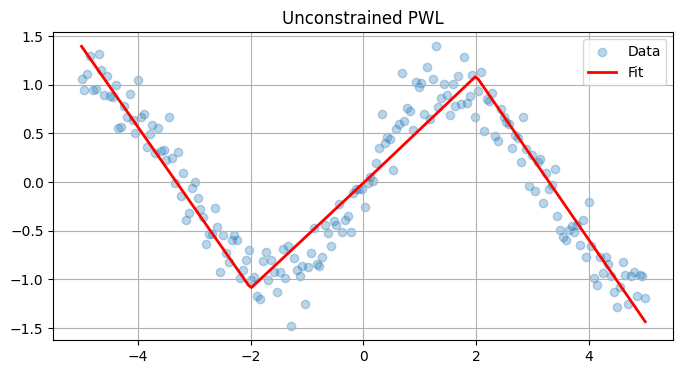

Anchored PWL (at x=-2, y=2 and x=2, y=-2):

✨ Model Summary ✨
Problem Status: ✅ optimal
--------------------------------------------------------------------------------
Spline Type               | Term            | Params   | Constraints                   
--------------------------------------------------------------------------------
🟢 PiecewiseLinear        | x               | 5        | Anchor                        
--------------------------------------------------------------------------------
📊 Total Parameters                         | 5        |



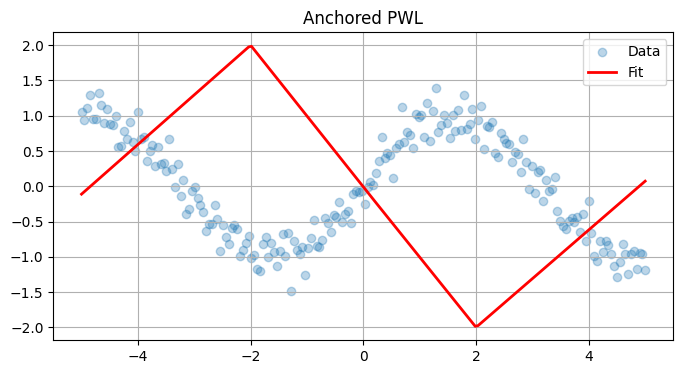

In [ ]:
# We'll use a Piecewise Linear spline and anchor it at (-2, 2) and (2, -2).
pwl = PiecewiseLinear("x", knots=[-2, 0, 2])

# Unconstrained
print("Unconstrained PWL:")
opt_unconstrained = LpRegressor(pwl)
plot_fit(opt_unconstrained, "Unconstrained PWL")

# Constrained
print("Anchored PWL (at x=-2, y=2 and x=2, y=-2):")
pwl_anchored = PiecewiseLinear("x", knots=[-2, 0, 2])
pwl_anchored.add_constraint(Anchor([(-2, 2), (2, -2)]))

opt_anchored = LpRegressor(pwl_anchored)
plot_fit(opt_anchored, "Anchored PWL")


## 2. Monotonic Constraint
The `Monotonic` constraint forces a spline to be monotonically increasing (or decreasing). Here we apply it to a `BSpline`.


Unconstrained B-Spline:

✨ Model Summary ✨
Problem Status: ✅ optimal
--------------------------------------------------------------------------------
Spline Type               | Term            | Params   | Constraints                   
--------------------------------------------------------------------------------
🟢 BSpline                | x               | 6        | None                          
--------------------------------------------------------------------------------
📊 Total Parameters                         | 6        |



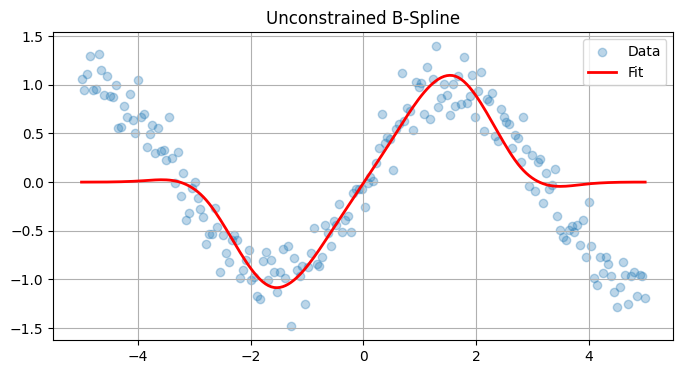

Monotonically Increasing B-Spline:

✨ Model Summary ✨
Problem Status: ✅ optimal
--------------------------------------------------------------------------------
Spline Type               | Term            | Params   | Constraints                   
--------------------------------------------------------------------------------
🟢 BSpline                | x               | 6        | Monotonic                     
--------------------------------------------------------------------------------
📊 Total Parameters                         | 6        |



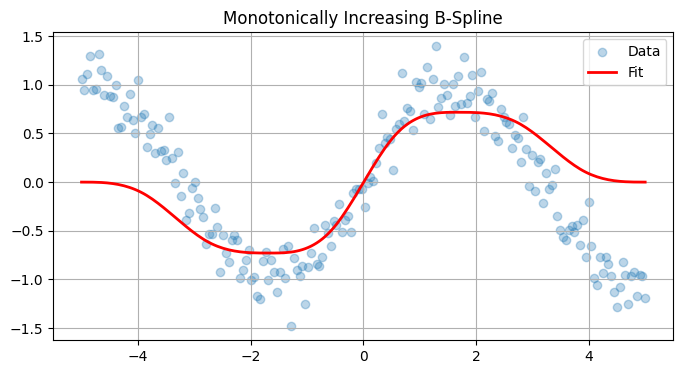

In [6]:
bsp = BSpline("x", knots=np.linspace(-5, 5, 10), degree=3)

# Unconstrained
print("Unconstrained B-Spline:")
opt_unconstrained = LpRegressor(bsp)
plot_fit(opt_unconstrained, "Unconstrained B-Spline")

# Constrained (Increasing)
print("Monotonically Increasing B-Spline:")
bsp_monot = BSpline("x", knots=np.linspace(-5, 5, 10), degree=3)
bsp_monot.add_constraint(Monotonic(decreasing=False))

opt_monot = LpRegressor(bsp_monot)
plot_fit(opt_monot, "Monotonically Increasing B-Spline")


## 3. Concave and Convex Constraints
The `Concave` and `Convex` constraints force the second derivative's behavior on a `BSpline`.
Let's see a `Convex` constraint on a new dataset.


In [4]:
# Convex data
y_convex = x_data**2 + np.random.normal(0, 2, 200)
df_convex = pl.DataFrame({"x": x_data, "y": y_convex})

def plot_fit_convex(opt, title=""):
    opt.fit(df_convex, df_convex["y"])
    y_pred = opt.predict(df_convex)
    
    plt.figure(figsize=(8, 4))
    plt.scatter(df_convex["x"], df_convex["y"], alpha=0.3, label="Data")
    plt.plot(df_convex["x"], y_pred, color='red', linewidth=2, label="Fit")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

bsp2 = BSpline("x", knots=[-3, -1, 1, 3], degree=3)

print("Unconstrained B-Spline on Convex Data:")
plot_fit_convex(LpRegressor(bsp2), "Unconstrained Output")

bsp2_convex = BSpline("x", knots=[-3, -1, 1, 3], degree=3).add_constraint(Convex())
print("Convex B-Spline:")
plot_fit_convex(LpRegressor(bsp2_convex), "Convexity Enforced")


Unconstrained B-Spline on Convex Data:


ValueError: Not enough knots for the given degree. Need len(knots) > degree + 1